
# Project: Investigate a Dataset of Patients who missed thier medical appointments 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

> We will walk through our analysis to find any patterns but first we have to clean and tidy our data make it easy to be analysed 

## Research Question :
### 1. Is there any feature or a combination of features can determine weather the patients show up for thier appointment or not ?

##### We will answer this during our analysis

In [135]:
#Importing important packages and libraries for analysis 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns 
%matplotlib inline


### Downloading Data 

In [2]:
!wget https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv no_show.csv

--2020-06-28 11:06:28--  https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv
Resolving d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)... 13.226.23.55, 13.226.23.155, 13.226.23.18, ...
Connecting to d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)|13.226.23.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10739535 (10M) [text/csv]
Saving to: ‘noshowappointments-kagglev2-may-2016.csv.2’

noshowappointments- 100%[===================>]  10.24M  42.7MB/s    in 0.2s    

2020-06-28 11:06:29 (42.7 MB/s) - ‘noshowappointments-kagglev2-may-2016.csv.2’ saved [10739535/10739535]

--2020-06-28 11:06:29--  http://no_show.csv/
Resolving no_show.csv (no_show.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘no_show.csv’
FINISHED --2020-06-28 11:06:29--
Total wall clock time: 0.6s
Downloaded: 1 files, 10M in 0.2s (42.7 MB/s)

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
# Loading the data
df=pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
print("The Data Frame has a {} rows and {} columns".format(df.shape[0],df.shape[1]))

The Data Frame has a 110527 rows and 14 columns


## Exploring the data

### 1- Data Types

In [5]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

1. First of all we should change `AppointmentID` and `ScheduledDay` to a Date data type , But we will tackle this in the data cleaning Section 

#### Function for priniting the column name along with the number of missing values in it

In [6]:
def check_missing(df):
    
    for i in df.columns:
        print(i,df[i].isna().sum())

### Checking Missing Values

In [7]:
check_missing(df)

PatientId 0
AppointmentID 0
Gender 0
ScheduledDay 0
AppointmentDay 0
Age 0
Neighbourhood 0
Scholarship 0
Hipertension 0
Diabetes 0
Alcoholism 0
Handcap 0
SMS_received 0
No-show 0


As we saw there's no missing values in all of the data set 

### Let's then check for the dupilcates

In [8]:
df.duplicated().sum()

0

Also there's no duplicates in the data set

### Data Structure

2. As we saw at the `No-Show` Column , it will more appropiate if we one-hot encoded it and made the Value for showing 1 and not Showing 0, we will also tackel this in the data cleaning section 

### Let's Check value counts form each column to see if we can see something intersting 

In [10]:
for i in df.columns:
    print(i)
    print("====================")
    print(df[i].value_counts())
    print("====================")

PatientId
8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
7.579746e+13    62
8.713749e+14    62
6.264199e+12    62
6.684488e+13    57
8.722785e+11    55
8.923969e+13    54
8.435224e+09    51
8.534397e+14    50
1.447997e+13    46
6.543360e+13    46
8.189452e+13    42
9.452745e+12    42
1.882323e+14    40
9.496197e+12    38
2.271580e+12    38
1.336493e+13    37
1.484143e+12    35
8.883500e+13    34
9.861628e+14    34
7.124589e+14    33
4.167557e+14    30
6.128878e+12    30
8.121397e+13    29
8.634164e+12    24
3.699499e+13    23
                ..
6.375629e+12     1
9.369127e+12     1
5.375556e+14     1
1.662184e+11     1
7.234615e+13     1
9.649990e+12     1
6.912783e+10     1
1.954265e+13     1
2.736377e+10     1
5.532694e+11     1
7.149583e+12     1
8.676752e+13     1
7.838359e+13     1
5.962625e+11     1
4.919862e+13     1
3.477350e+14     1
1.626595e+13     1
7.794917e+12     1
1.161950e+13     1
5.615364e+14     1
4.355592e+11     1
1.

<br> <a id='multi'></a>1. For `PatientID` : we see that there exist a patients who had a multiple appointments before, would this make any difference ? we may engineer a new feature to help in our analysis
<br> 2. For `AppoitmentID` : We should see if there's any duplicated appointment id (in the below cell eveything seems fine)
<br> 3. For `age` : we're seeing there's age of 0 and -1 which doesn't seem right, so we should remove them
<br> 4. All other columns seems fine

In [11]:
(df['AppointmentID'].value_counts()>1).sum()

0

#### As we saw in the cell above, there's no duplicated 

# Data Cleaning

## Let's Change the data types first

In [12]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [13]:
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

## Now For the No Show Column , let's rename it to 'showed'

In [14]:
df.rename(columns={'No-show':'showed'},inplace=True)
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,showed
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


## Now let's do the one-hot encoding, 0 for not showing, and 1 for showing 
This part is kind of tricky because in the data description , No means( That the patient showed) while Yes means ( he/she didn't show up)
So No will be 1, And yes 0

In [15]:
df['showed']=df['showed'].apply(lambda x:1 if x=='No' else 0)
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,showed
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1


## Now we should drop the rows containing age values of less than 1

In [16]:
df.shape

(110527, 14)

This method is way more easier than using the drop function since we're dropping based on a condition 

In [17]:
df=df[df['Age']>0]
df.shape

(106987, 14)

In [18]:
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
showed                     int64
dtype: object

### Also the Appointment ID column won't affect our data since they're all different and doesn't has any meaning to analyse it , so it would be better if we dropped it 

In [19]:
df.drop(columns='AppointmentID',inplace=True)
df.columns

Index(['PatientId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'showed'],
      dtype='object')

## Now we can say that our data is cleaned and ready to be explored !

# Exploratory Data Analysis

In [20]:
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,showed
0,2.987250e+13,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


#### Let's see the propotion of people who showed up 

In [32]:
print("{} People showed up of approximately {:0.1f}%".format(df['showed'].sum(),df['showed'].mean()*100))
print("{} People didn't showed up of approximately {:0.1f}%".format(df.shape[0]-df['showed'].sum(),100-(df['showed'].mean()*100)))

85307 People showed up of approximately 79.7%
21680 People didn't showed up of approximately 20.3%


## Let's see some description of the data

In [21]:
df.describe()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,showed
count,1.069870e+05,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,1.472814e+14,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264,0.797359
std,2.558267e+14,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725,0.401969
min,3.921784e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173523e+12,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.172463e+13,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.433600e+13,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


#### Let's see some statistics for people who showed and didn't show 

In [26]:
showed=df['showed']==1
df[showed].head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,showed
0,2.987250e+13,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [25]:
n_showed=df['showed']==0
df[n_showed].head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,showed
6,7.336882e+14,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,0
7,3.449833e+12,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,0
11,7.542951e+12,M,2016-04-26 08:44:12,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,0
17,1.479497e+13,F,2016-04-28 09:28:57,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,0
20,6.222575e+14,F,2016-04-27 07:51:14,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,0


## Let's see some statistics of people who didn't show up 

In [33]:
df[n_showed].describe()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,showed
count,2.168000e+04,21680.000000,21680.000000,21680.000000,21680.000000,21680.000000,21680.000000,21680.000000,21680.0
mean,1.467318e+14,35.329151,0.118589,0.173985,0.065959,0.031227,0.020895,0.441328,0.0
std,2.548937e+14,21.470631,0.323311,0.379106,0.248217,0.173935,0.158923,0.496557,0.0
min,5.628261e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,4.188006e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,3.155597e+13,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,9.454249e+13,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
max,9.996585e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,0.0


1. The mean age is 35
2. Barely 12% of them had a scholarship 
3. 17.3% of them was Hipertensed 
4. But the most important thing that 44% of them recieved an SMS ( which rejects the hypothesis that they may forgotten thier appointment time

## Let's see some statistics of people who showed up 

In [28]:
df[showed].describe()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,showed
count,8.530700e+04,85307.000000,85307.000000,85307.000000,85307.000000,85307.000000,85307.000000,85307.000000,85307.0
mean,1.474210e+14,39.075187,0.096569,0.211343,0.076348,0.031451,0.023503,0.293258,1.0
std,2.560646e+14,22.649713,0.295372,0.408263,0.265555,0.174535,0.165405,0.455259,0.0
min,3.921784e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,4.168386e+12,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,3.175389e+13,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,9.423395e+13,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.0


1. The mean age is 39
2. Barely 10% of them had a scholarship 
3. 21.1% of them was Hipertensed 
4. But the most important thing that 30% of them recieved an SMS ( which rejects the hypothesis that they may forgotten thier appointment time

# Question 1  (Does the males showes up more than females?)

Let's first check for the number of males and females in the data set 

In [34]:
print("{:.1f}% of females showed Up".format(df[df['Gender']=='F']['showed'].mean()*100))
print("{:.1f}% of males showed Up".format(df[df['Gender']=='M']['showed'].mean()*100))

79.6% of females showed Up
79.9% of males showed Up


The percentage are approximately the same, so i guess the gender isn't a factor

## Let's make another variable that is the difference between the appointment day and the scheduled day, it make make a difference in how we are seeing the data

Since we need only the date not the hourly stamp we should truncate to the date

In [35]:
df['date_dif']=(((df['AppointmentDay'].dt.date)-(df['ScheduledDay'].dt.date))/np.timedelta64(1, 'D')).astype(int)
df.head(1)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,showed,date_dif
0,2.987250e+13,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0


Since we will be using this in analysis let's see the distribution of the date_diff

In [36]:
df['date_dif'].describe()

count    106987.000000
mean         10.166721
std          15.263508
min          -6.000000
25%           0.000000
50%           4.000000
75%          14.000000
max         179.000000
Name: date_dif, dtype: float64

Here we find something important, it's not rational to have a difference between the two dates in negative, since the appointment date must be bigger than the scheduled date! so we here should drop rows of date_diff < 0 ! Good relization i guess

In [37]:
df.shape

(106987, 14)

In [38]:
df=df[df['date_dif']>=0]
df.shape

(106982, 14)

In [39]:
df['date_dif'].describe()

count    106982.000000
mean         10.167290
std          15.263631
min           0.000000
25%           0.000000
50%           4.000000
75%          14.000000
max         179.000000
Name: date_dif, dtype: float64

Now let's make a column of the hour of the scheduled day 

In [40]:
df['sched_h']=df['ScheduledDay'].dt.hour
df.head(1)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,showed,date_dif,sched_h
0,2.987250e+13,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0,18


Now we can drop both columns of scheduled day and appointment day 

In [41]:
df.drop(columns=['ScheduledDay','AppointmentDay'],inplace=True)

In [42]:
df.head()

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,showed,date_dif,sched_h
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0,18
1,5.589978e+14,M,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0,16
2,4.262962e+12,F,62,MATA DA PRAIA,0,0,0,0,0,0,1,0,16
3,8.679512e+11,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0,17
4,8.841186e+12,F,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0,16


Now let's reshape the dataset to have our features after another and dependant variable at the end

In [43]:
df.columns

Index(['PatientId', 'Gender', 'Age', 'Neighbourhood', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
       'showed', 'date_dif', 'sched_h'],
      dtype='object')

In [44]:
new_cols=['PatientId', 'Neighbourhood','Gender', 'Age', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received','date_dif', 'sched_h',
       'showed']

In [45]:
df=df[new_cols]
df.head()

,PatientId,Neighbourhood,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,date_dif,sched_h,showed
0,2.987250e+13,JARDIM DA PENHA,F,62,0,1,0,0,0,0,0,18,1
1,5.589978e+14,JARDIM DA PENHA,M,56,0,0,0,0,0,0,0,16,1
2,4.262962e+12,MATA DA PRAIA,F,62,0,0,0,0,0,0,0,16,1
3,8.679512e+11,PONTAL DE CAMBURI,F,8,0,0,0,0,0,0,0,17,1
4,8.841186e+12,JARDIM DA PENHA,F,56,0,1,1,0,0,0,0,16,1


In [46]:
df.describe()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,date_dif,sched_h,showed
count,1.069820e+05,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000
mean,1.472785e+14,38.316315,0.101036,0.203782,0.074246,0.031407,0.022957,0.323279,10.167290,10.772130,0.797396
std,2.558181e+14,22.466023,0.301377,0.402811,0.262172,0.174416,0.164064,0.467730,15.263631,3.226063,0.401942
min,3.921784e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000
25%,4.173345e+12,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000
50%,3.172598e+13,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,10.000000,1.000000
75%,9.433627e+13,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000,13.000000,1.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000,21.000000,1.000000


## Let's Visualize our data set

Let's see correlation between variables

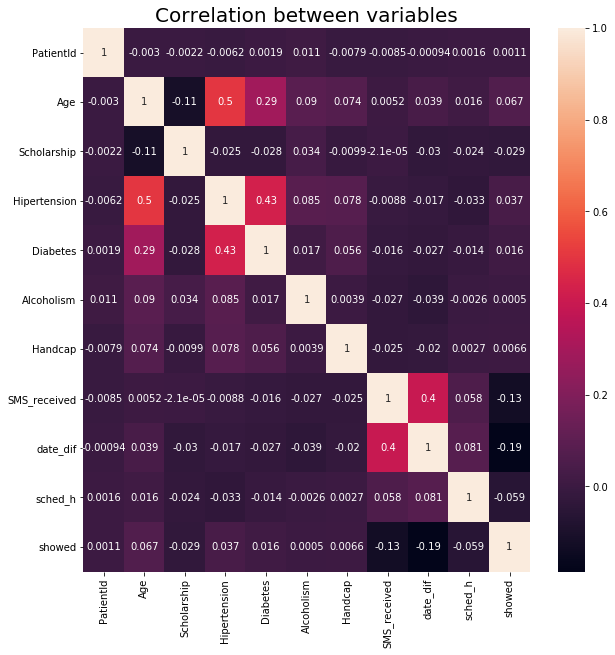

In [52]:
plt.figure(figsize=(10,10))
ax=sns.heatmap(df.corr(),annot=True);
ax.axes.set_title("Correlation between variables",fontsize=20);

#### Okay,we see that the highest features correlated with showed are = `SMS_received` and `date_dif`

### Let's see if the age can make any difference

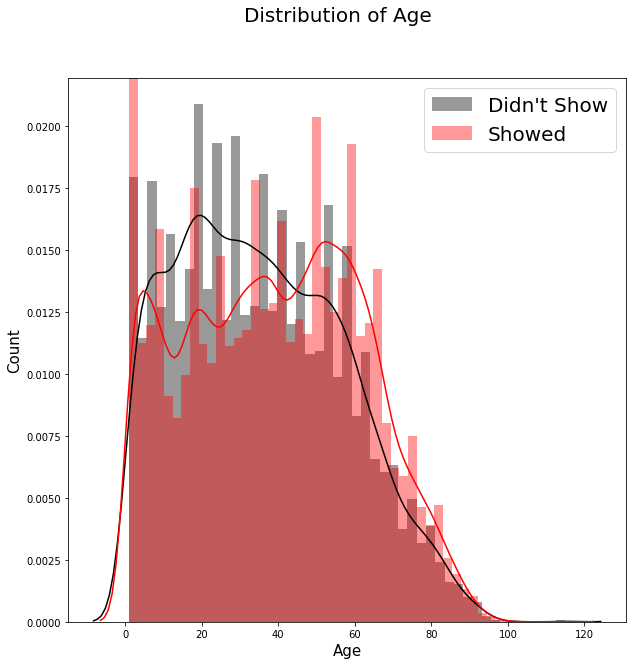

In [154]:
plt.figure(figsize=(10,10));
sns.distplot(df[df['showed']==0]['Age'],color='black',label="Didn't Show");
sns.distplot(df[df['showed']==1]['Age'],color='r',label="Showed");
plt.xlabel("Age",fontsize=15);
plt.ylabel("Count",fontsize=15);
plt.suptitle("Distribution of Age",fontsize=20);
plt.legend(prop={'size':20});

### Let's see if the waiting days   and recieving sms can make any difference

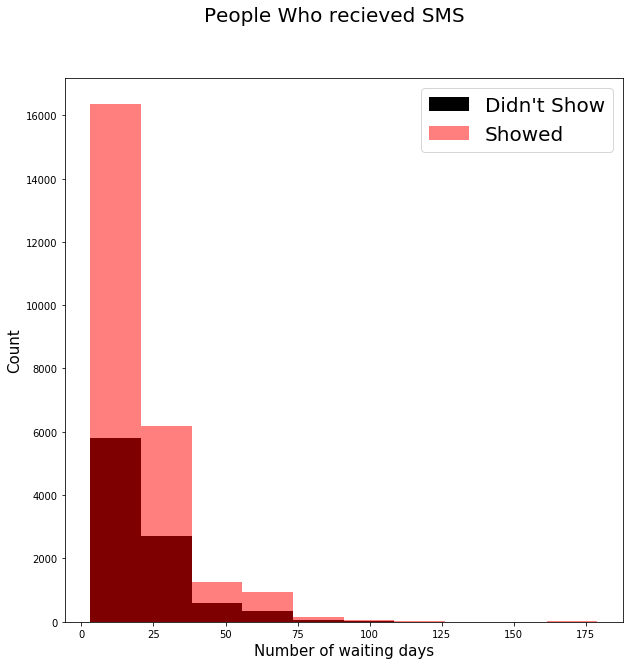

In [71]:
plt.figure(figsize=(10,10));
plt.hist(df.query('showed == 0 and SMS_received == 1')['date_dif'],color='black',label="Didn't Show",alpha=1);
plt.hist(df.query('showed == 1 and SMS_received == 1')['date_dif'],color='red',label="Showed",alpha=0.5);
plt.suptitle("People Who recieved SMS",fontsize=20);
plt.xlabel("Number of waiting days",fontsize=15);
plt.ylabel("Count",fontsize=15);
plt.legend(prop={'size':20});

### Let's see if the waiting days   and not recieving sms can make any difference

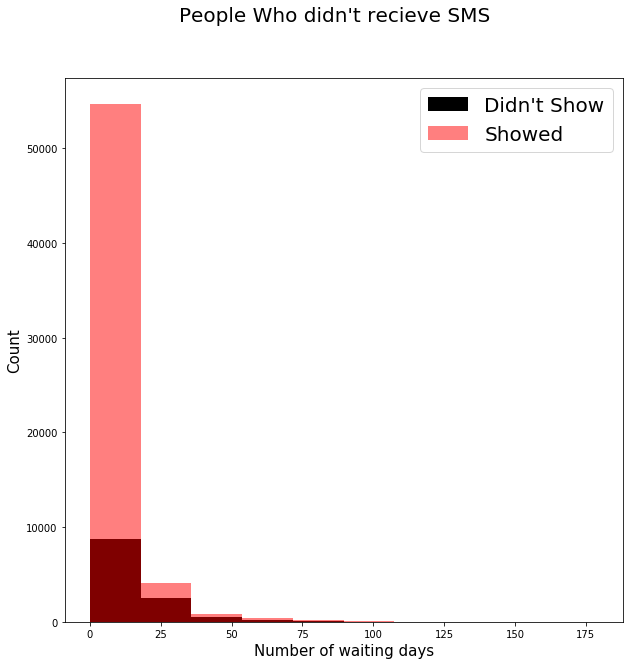

In [74]:
plt.figure(figsize=(10,10));
plt.hist(df.query('showed == 0 and SMS_received == 0')['date_dif'],color='black',label="Didn't Show",alpha=1);
plt.hist(df.query('showed == 1 and SMS_received == 0')['date_dif'],color='red',label="Showed",alpha=0.5);
plt.suptitle("People Who didn't recieve SMS",fontsize=20);
plt.xlabel("Number of waiting days",fontsize=15);
plt.ylabel("Count",fontsize=15);
plt.legend(prop={'size':20});

## We can say that people who had a long time waiting and didn't recieve a message missed thier appointment 

In [76]:
print("Percentage of people who waited long time and didn't reviece a message and didn't show up is {:.2f}%".format((1-df.query('date_dif >= 4 and SMS_received==0')['showed'].mean())*100))

Percentage of people who waited long time and didn't reviece a message and didn't show up is 33.33%


### Let's see the different distributions

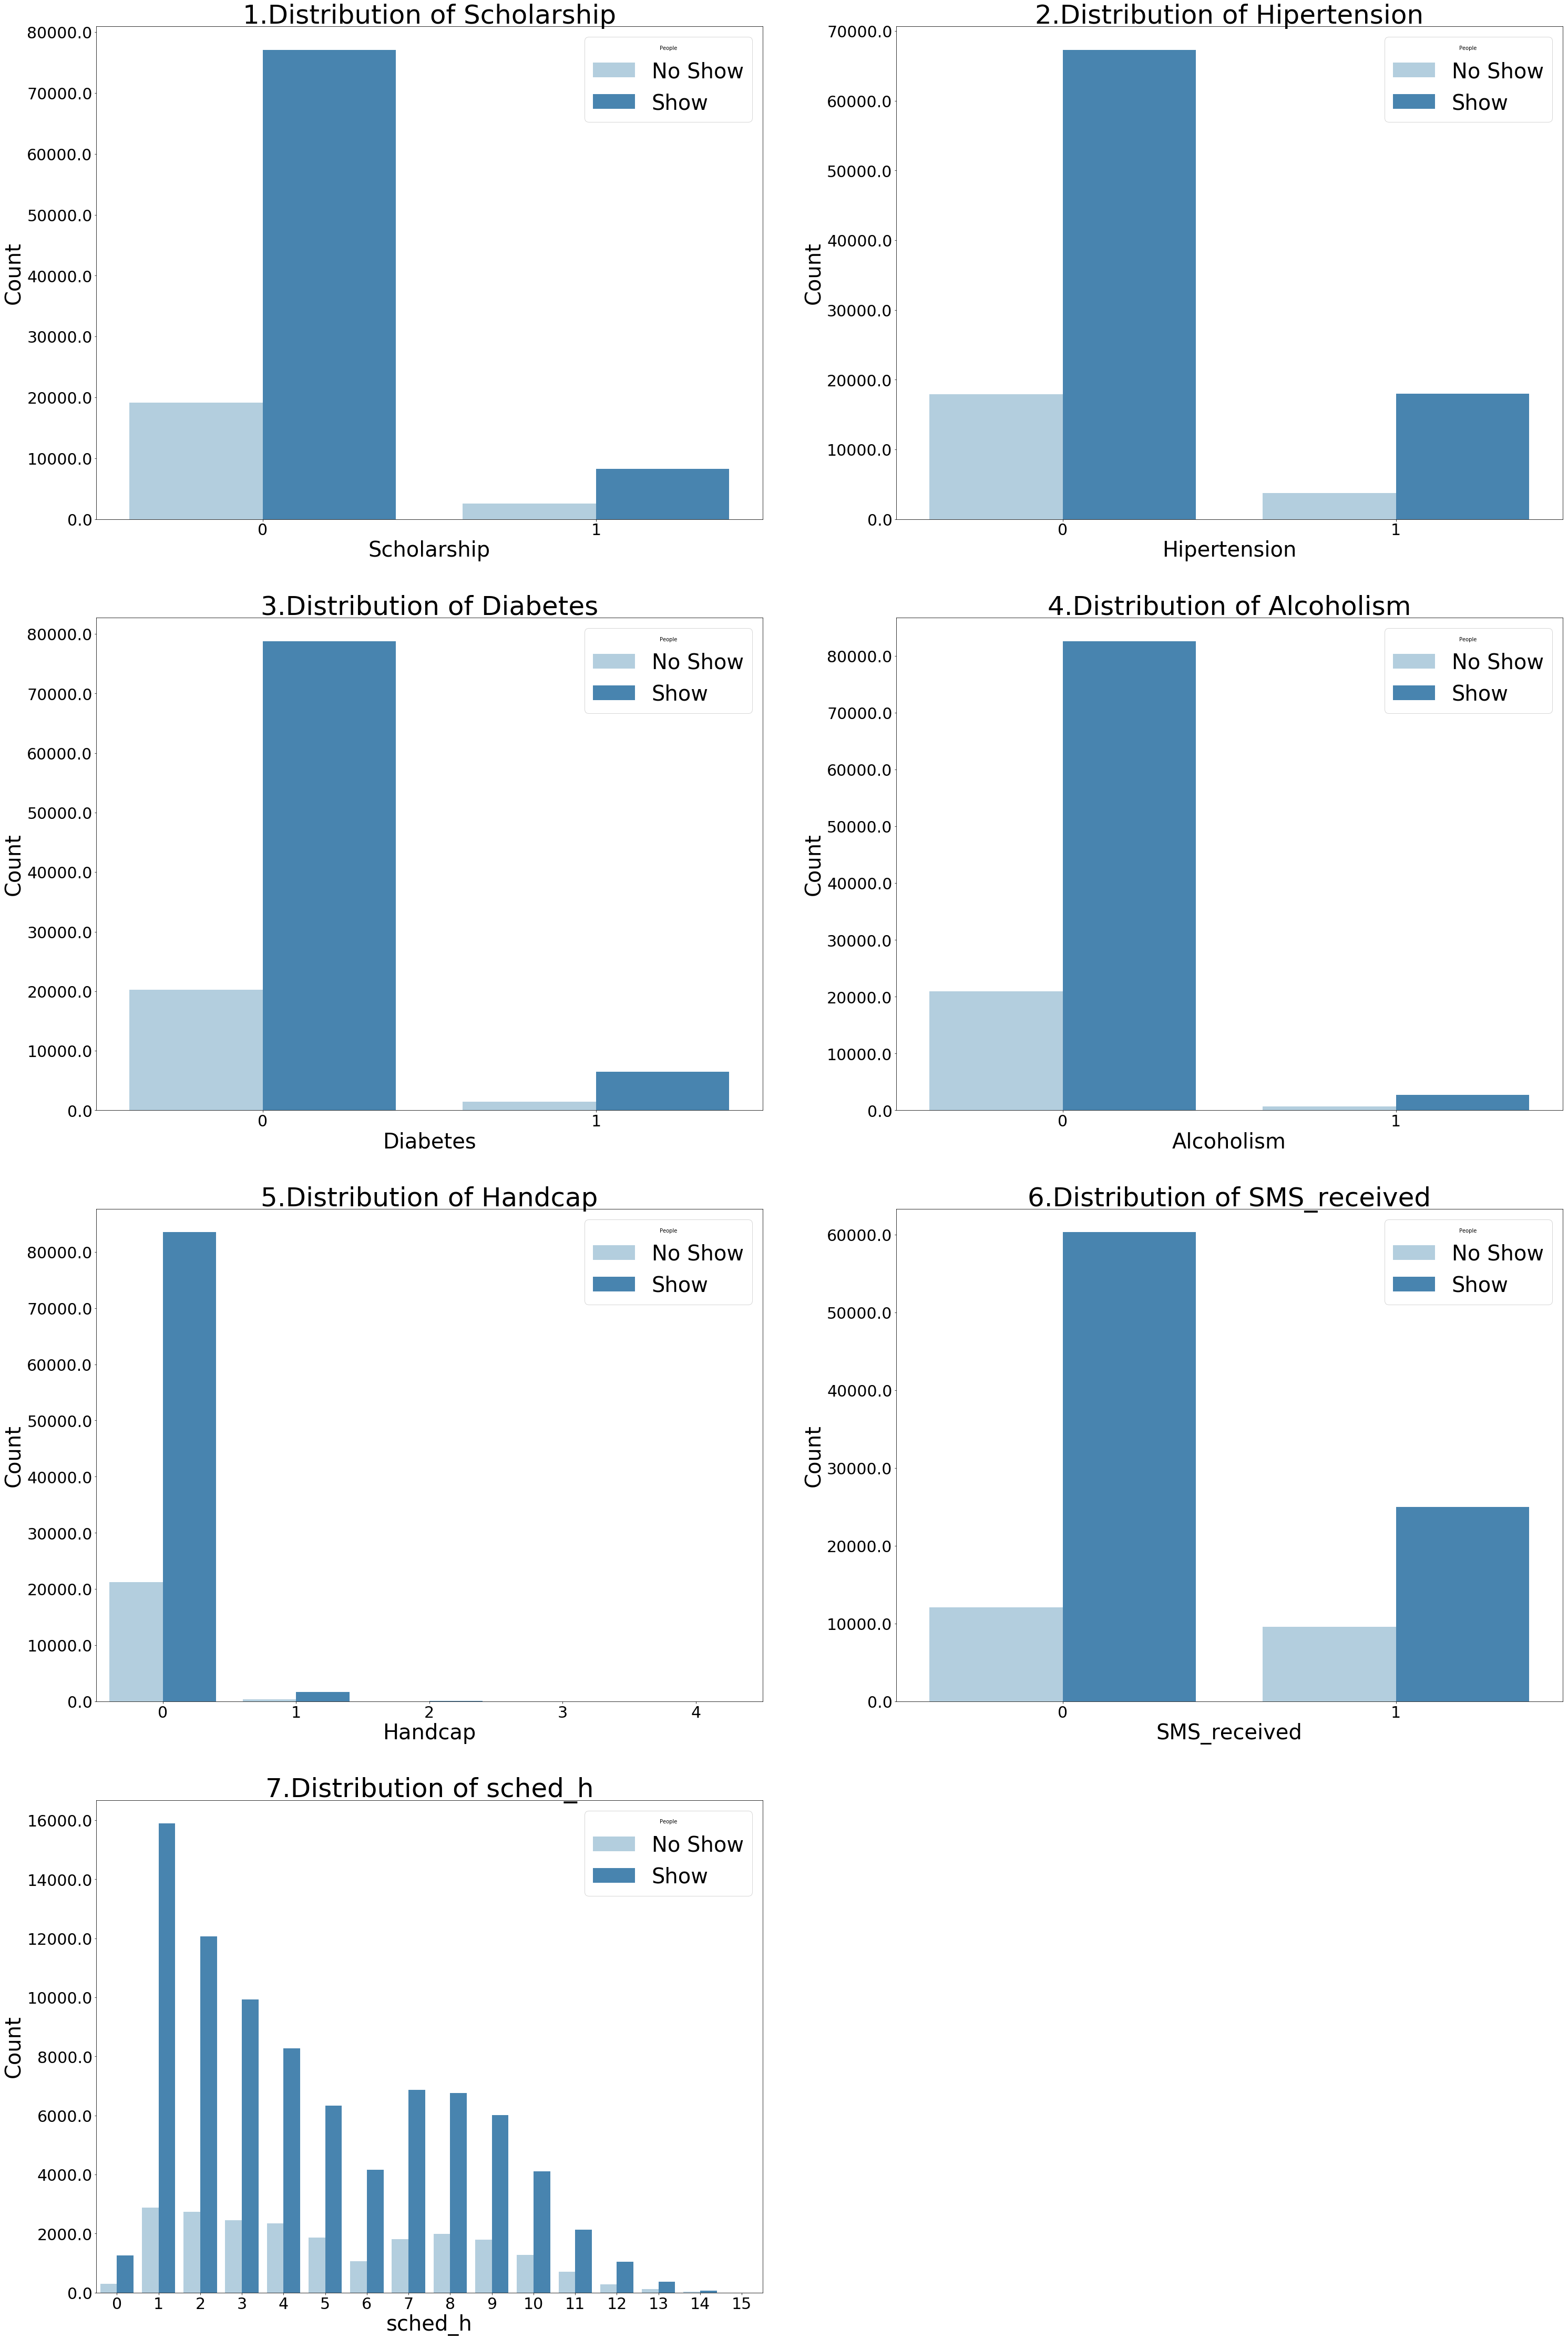

In [115]:
fig = plt.figure(figsize = (50, 100))
j = 0
for i in df.columns[4:12]:
    if(i=='date_dif'):
        continue
    plt.subplot(5, 2, j+1)
    j+= 1
    ax=sns.countplot(x=i,hue='showed',data=df,palette="Blues")
    ax.set_yticklabels(ax.get_yticks(), size = 30)
    ax.set_xticklabels(ax.get_xticks(), size = 30)
    ax.axes.set_xlabel("{}".format(i),fontsize=40);
    ax.axes.set_ylabel("Count",fontsize=40);
    ax.axes.set_title("{}.Distribution of {}".format(j,i),fontsize=50);
    ax.axes.legend(title="People",labels=["No Show","Show"],prop={'size':40});
plt.show()

### As we saw in the above distribution plots we cannot find and any explicit pattern and it needs further examinations

Let's check if the patients had a previous appointments as we disscussed <li><a href="#multi">Above</a></li>

In [119]:
df['PatientId'].value_counts().to_frame().head(4)

,PatientId
8.221459e+14,88
9.963767e+10,84
2.688613e+13,70
3.353478e+13,65


As we saw there are patiens that it's not thier first time 
<br> let's make a new column which says it's the patients first time or not

In [120]:
df['again']=0

Let's chagne value of again to 1 to for patients who had previous appointments

In [121]:
isdup=df['PatientId'].duplicated()==True
df.loc[df['PatientId'].duplicated()==True,'again']=1

In [122]:
df.tail()

,PatientId,Neighbourhood,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,date_dif,sched_h,showed,again
110522,2.572134e+12,MARIA ORTIZ,F,56,0,0,0,0,0,1,35,9,1,1
110523,3.596266e+12,MARIA ORTIZ,F,51,0,0,0,0,0,1,35,7,1,1
110524,1.557663e+13,MARIA ORTIZ,F,21,0,0,0,0,0,1,41,16,1,0
110525,9.213493e+13,MARIA ORTIZ,F,38,0,0,0,0,0,1,41,15,1,1
110526,3.775115e+14,MARIA ORTIZ,F,54,0,0,0,0,0,1,41,13,1,1


Let's see the propotions

In [123]:
print("{:.1f}% of new patients showed Up".format(df[df['again']==0]['showed'].mean()*100))
print("{:.1f}% of old patients Up".format(df[df['again']==1]['showed'].mean()*100))

80.4% of new patients showed Up
78.9% of old patients Up


We've 2 important discrete features but not categorical Which are : `date_dif` and `sched_h`
So let's see thier distribution then encode them based on the range 

In [124]:
df['date_dif'].describe()

count    106982.000000
mean         10.167290
std          15.263631
min           0.000000
25%           0.000000
50%           4.000000
75%          14.000000
max         179.000000
Name: date_dif, dtype: float64

In [125]:
df['date_dif']=df['date_dif'].apply(lambda x:"low" if x<= 4 else ("medium" if (x > 4 and x <= 14) else "high"))
df.head()

,PatientId,Neighbourhood,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,date_dif,sched_h,showed,again
0,2.987250e+13,JARDIM DA PENHA,F,62,0,1,0,0,0,0,low,18,1,0
1,5.589978e+14,JARDIM DA PENHA,M,56,0,0,0,0,0,0,low,16,1,0
2,4.262962e+12,MATA DA PRAIA,F,62,0,0,0,0,0,0,low,16,1,0
3,8.679512e+11,PONTAL DE CAMBURI,F,8,0,0,0,0,0,0,low,17,1,0
4,8.841186e+12,JARDIM DA PENHA,F,56,0,1,1,0,0,0,low,16,1,0


From 0 to 4 low
From 5 to 14 Medium 
Bigger than 14 High

In [126]:
df['sched_h'].describe()

count    106982.000000
mean         10.772130
std           3.226063
min           6.000000
25%           8.000000
50%          10.000000
75%          13.000000
max          21.000000
Name: sched_h, dtype: float64

In [127]:
df['sched_h']=df['sched_h'].apply(lambda x:"morning" if x<= 11 else ("noon" if (x > 11 and x <= 17) else "evening"))
df.head()

,PatientId,Neighbourhood,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,date_dif,sched_h,showed,again
0,2.987250e+13,JARDIM DA PENHA,F,62,0,1,0,0,0,0,low,evening,1,0
1,5.589978e+14,JARDIM DA PENHA,M,56,0,0,0,0,0,0,low,noon,1,0
2,4.262962e+12,MATA DA PRAIA,F,62,0,0,0,0,0,0,low,noon,1,0
3,8.679512e+11,PONTAL DE CAMBURI,F,8,0,0,0,0,0,0,low,noon,1,0
4,8.841186e+12,JARDIM DA PENHA,F,56,0,1,1,0,0,0,low,noon,1,0


For the hours , we know that from 6:00 AM to 11:00 AM is morning , and from 12:00 PM to 17:00  that after noon 
And from 18:00 to 21:00 ( our maximum let's consider it as evening ) 

### Let's see the propotion of patients who waited long time and showed up or didn't show up

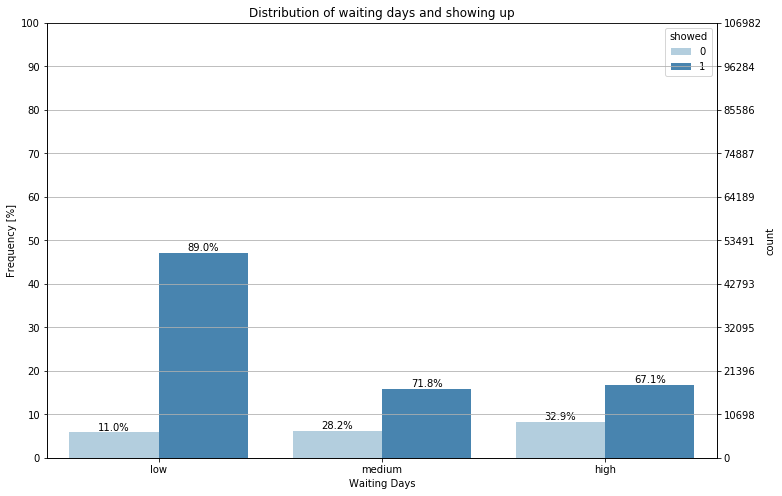

In [152]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='date_dif',hue='showed',data=df,palette="Blues");
lcount = len(df[df['date_dif']=='low'])
mcount=len(df[df['date_dif']=='medium'])
hcount=len(df[df['date_dif']=='high'])
ax.axes.set_title("Distribution of waiting days and showing up");
ax.axes.set_xlabel("Waiting Days");

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for i,p in enumerate(ax.patches):
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    if i in [0,3]:
        ax.annotate('{:.1f}%'.format(100.*(y/lcount)), (x.mean(), y), 
            ha='center', va='bottom')
    elif i in [1,4]:
        ax.annotate('{:.1f}%'.format(100.*(y/mcount)), (x.mean(), y), 
            ha='center', va='bottom')
    else:
        ax.annotate('{:.1f}%'.format(100.*(y/hcount)), (x.mean(), y), 
            ha='center', va='bottom')
    
    # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

### As we see in the above plot that barely 33% of people that had to wait too long didn't show up for thier appointments

# Let's group by some features and see if we can recognize some pattern

In [128]:
df.groupby(['Gender','date_dif','SMS_received','again']).aggregate({'PatientId':'count','showed':'mean'}).query('showed < 0.8')

PatientId    showed
Gender date_dif SMS_received again                     
F      high     0            0           4188  0.648997
                             1           2593  0.618203
                1            0           6842  0.716749
                             1           4441  0.676424
       low      1            0           1327  0.774680
                             1           1307  0.783474
       medium   0            0           3100  0.707742
                             1           2989  0.666109
                1            0           5105  0.738296
                             1           4735  0.721859
M      high     0            0           2296  0.616289
                             1           1282  0.599064
                1            0           3341  0.698593
                             1           1755  0.680912
       low      1            0            733  0.793997
                             1            536  0.744403
       medium   0            0           1618  0.690977
                             1           1565  0.689457
                1            0           2493  0.750501
                             1           1970  0.755838

In [153]:
df.groupby(['date_dif','SMS_received']).aggregate({'PatientId':'count','showed':'mean'})

PatientId    showed
date_dif SMS_received                     
high     0                 10359  0.627860
         1                 16379  0.698272
low      0                 52766  0.898382
         1                  3903  0.777095
medium   0                  9272  0.688309
         1                 14303  0.737398

<a id='conclusions'></a>
## Conclusions

As we saw in the plots that most of features doesn't play an important role but if they are grouped in the right way we can find a pattern, as we saw above that approximatly 40% of Females that had to wait too long for thier appointment and didn't recieve a message and it was thier first time , missed their appointment, also people that had to wait long and it was thier first time we can say that barely 32% of them missed thier appointments,  we could discover more by using machine learing in a further step to know what are the most important combination that could affect our final decision
1. As we saw that most of the features doesn't explicitly play an important role in determining weather the patient will show up or not 
2. From the above statics we can conclude that approximately the same percentage of males and females showed up to thier appointments.
3. Also people that waited too long for thier appointments , barely 33% of them didn't show up at all.
4. Also people that waited too long for thier appointments and didn't recieve a message 40% of them didn't show up.
5. And we should be sure that correlation doesn't imply causation and most of the features played a huge role in this

##### One important thing that the data set need further examination and some inferential statistics since the sample size isn't that big and we are trying to find to predict some action for the whole population based on those samples.

##### Also it will be much better if used machine learning like `random forest` or any classifcation alogrithm to now what are the most important group of features to determine weather the patient will show up or not 


In [155]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0